## House Price Prediction Modelling

#### Problem Statement: Given the data set, build a model to predict the house price based on certain parameters. This will then be used by the business to make decision to buy and resell houses in a profitable manner.

###### Steps followed:
1. Data Understanding
2. EDA and Data Preperation
    a. EDA
    b. Missing data handling
    c. Derived variables
    d. Dummy Variables
3. Model Building
    a. X-Y split
    b. Scaling
    c. Test Train split
    d. OLS Model using RFE and VIF 
    e. Ridge Model
    f. Lasso Model
4. Model Evaluation
    a. VIF, p Value
    b. R2
5. Prediction
6. Conclusion


In [412]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np
#Importing matplotlib
import matplotlib.pyplot as plt
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

In [413]:
# reading the dataset
house_price = pd.read_csv("train.csv")
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2    ...    WoodDeckSF OpenPorchSF  EnclosedPorch  3SsnPorch  \
0       Norm    ...             0          61              0          0   
1       Norm    ...           298           0              0          0   
2       Norm    ...             0          42              0          0   
3       Norm    ...             0          35            272          0   
4       Norm    ...           192          84              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature MiscVal MoSold  YrSold  \
0            0         0    NaN   NaN         NaN       0      2    2008   
1            0         0    NaN   NaN         NaN       0      5    2007   
2            0         0    NaN   NaN         NaN       0      9    2008   
3            0         0    NaN   NaN         NaN       0      2    2006   
4            0         0    NaN   NaN         NaN       0     12    2008   

  SaleType SaleCondition SalePrice  
0       WD        Normal    208500  
1       WD        Normal    181500  
2       WD        Normal    223500  
3       WD       Abnorml    140000  
4       WD        Normal    250000  

[5 rows x 81 columns]

In [414]:
# Data display coustomization
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)

#### Data Understanding

In [415]:
# Dimensions 
house_price.shape

(1460, 81)

In [416]:
#Check the datatypes
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [417]:
# Checking the percentage of missing values 
round(100*(house_price.isnull().sum()/len(house_price.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
                 ...  
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
PoolQC           99.52
Fence            80.75
MiscFeature      96.30
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

### EDA and Data Preparation

In [418]:
#Drop all columns with more than 50% (so 730 missing values is the threshold) missing values
#house_price.shape[0]*0.5
house_price.dropna(thresh=house_price.shape[0]*0.5,how='all',axis=1,inplace = True)

In [419]:
# Checking the percentage of missing values again
data_check = round(100*(house_price.isnull().sum()/len(house_price.index)), 2)

In [420]:
# Check all the columns with missing data one by one to decide on the next steps
data_check[0:20]

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage     17.74
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
dtype: float64

In [421]:
house_price['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [422]:
#Based on the above, imputing LotFrontage with the mean
house_price.LotFrontage.fillna( house_price.LotFrontage.mean(),inplace=True)

In [423]:
# Checking the percentage of missing values again
data_check = round(100*(house_price.isnull().sum()/len(house_price.index)), 2)

In [424]:
data_check[0:20]

Id              0.0
MSSubClass      0.0
MSZoning        0.0
LotFrontage     0.0
LotArea         0.0
Street          0.0
LotShape        0.0
LandContour     0.0
Utilities       0.0
LotConfig       0.0
LandSlope       0.0
Neighborhood    0.0
Condition1      0.0
Condition2      0.0
BldgType        0.0
HouseStyle      0.0
OverallQual     0.0
OverallCond     0.0
YearBuilt       0.0
YearRemodAdd    0.0
dtype: float64

In [425]:
data_check[20:40]

RoofStyle       0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
MasVnrType      0.55
MasVnrArea      0.55
ExterQual       0.00
ExterCond       0.00
Foundation      0.00
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinSF1      0.00
BsmtFinType2    2.60
BsmtFinSF2      0.00
BsmtUnfSF       0.00
TotalBsmtSF     0.00
Heating         0.00
HeatingQC       0.00
dtype: float64

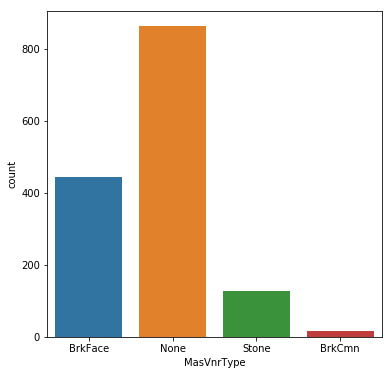

In [426]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.countplot(house_price.MasVnrType)
#xticks(rotation = 90)

In [427]:
#Since None is the mode of this column, impute the nulls with this
house_price.MasVnrType.fillna('None',inplace=True)

In [428]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
house_price['MasVnrArea'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
90%       335.000000
95%       456.000000
99%       791.920000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [429]:
#Based on the above, imputing LotFrontage with the median, which is 0
# Data seems to be skewed due to outliers, the missing value percentage is very low, hence it should be fine 
house_price.MasVnrArea.fillna( house_price.MasVnrArea.median(),inplace=True)

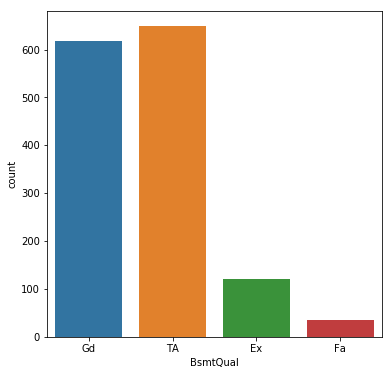

In [430]:
#Check for other variables - BsmtQual        
plt.figure(figsize=(6,6))
sns.countplot(house_price.BsmtQual)

In [431]:
house_price.BsmtQual.mode()

0    TA
dtype: object

In [432]:
#Impute the nulls with the mode
house_price.BsmtQual.fillna("TA",inplace=True)

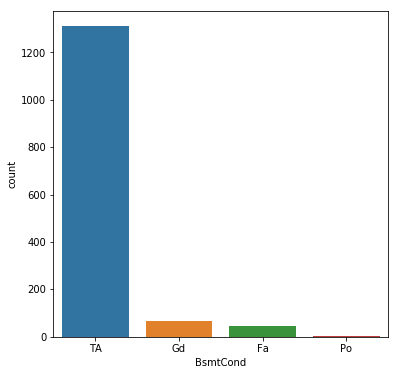

In [433]:
#Check for other variables - BsmtCond        
plt.figure(figsize=(6,6))
sns.countplot(house_price.BsmtCond)        

In [434]:
#Impute the nulls with the mode
house_price.BsmtCond.fillna("TA",inplace=True)

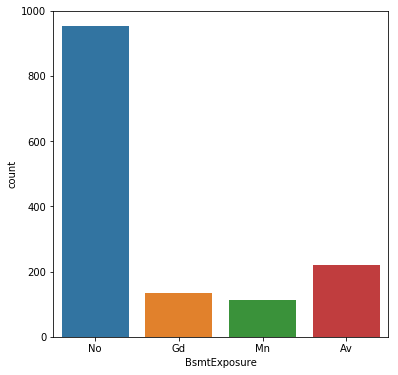

In [435]:
#Check for other variables - BsmtExposure        
plt.figure(figsize=(6,6))
sns.countplot(house_price.BsmtExposure)        

In [436]:
#Impute the nulls with the mode
house_price.BsmtExposure.fillna("No",inplace=True)

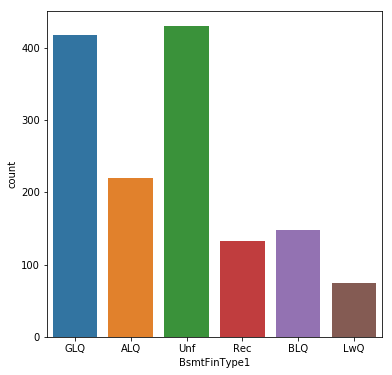

In [437]:
#Check for other variables - BsmtFinType1        
plt.figure(figsize=(6,6))
sns.countplot(house_price.BsmtFinType1)     

In [438]:
#Impute the nulls with the mode
house_price.BsmtFinType1.fillna("Unf",inplace=True)

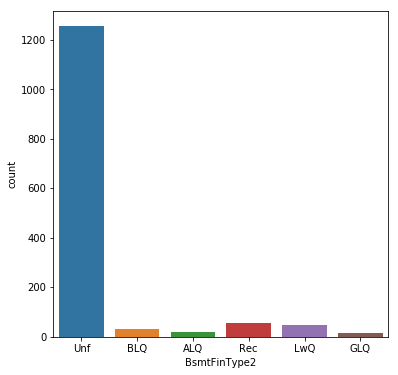

In [439]:
#Check for other variables - BsmtFinType2        
plt.figure(figsize=(6,6))
sns.countplot(house_price.BsmtFinType2)   

In [440]:
#Impute the nulls with the mode
house_price.BsmtFinType2.fillna("Unf",inplace=True)

In [441]:
# Checking the percentage of missing values again
data_check = round(100*(house_price.isnull().sum()/len(house_price.index)), 2)

In [442]:
data_check[20:40]

RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
BsmtFinType2    0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
TotalBsmtSF     0.0
Heating         0.0
HeatingQC       0.0
dtype: float64

In [443]:
data_check[40:60]

CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBath     0.00
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
KitchenQual      0.00
TotRmsAbvGrd     0.00
Functional       0.00
Fireplaces       0.00
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
dtype: float64

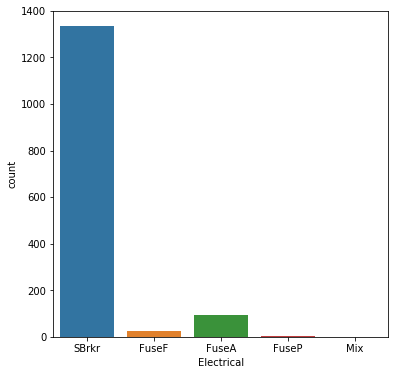

In [444]:
#Check for other variables - Electrical        
plt.figure(figsize=(6,6))
sns.countplot(house_price.Electrical)  

In [445]:
#Impute the nulls with the mode
house_price.Electrical.fillna("SBrkr",inplace=True)

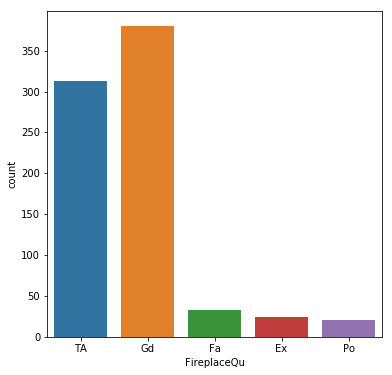

In [446]:
#Check for other variables - FireplaceQu        
plt.figure(figsize=(6,6))
sns.countplot(house_price.FireplaceQu)     

In [447]:
#Impute the nulls with the mode
house_price.FireplaceQu.fillna("Gd",inplace=True)

In [448]:
#GarageType
house_price['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [449]:
#Impute the nulls with the mode
house_price.GarageType.fillna("Attchd",inplace=True)

In [450]:
#GarageFinish    
house_price['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [451]:
#Impute the nulls with the mode
house_price.GarageFinish.fillna("Unf",inplace=True)

In [452]:
#GarageFinish    
house_price['GarageYrBlt'].value_counts()     

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
          ..
2010.0     3
1923.0     3
1937.0     2
1934.0     2
1918.0     2
1947.0     2
1929.0     2
1914.0     2
1915.0     2
1942.0     2
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [453]:
#Impute the nulls with the mode
house_price.GarageYrBlt.fillna("2005",inplace=True)

In [454]:
# Checking the percentage of missing values again
data_check = round(100*(house_price.isnull().sum()/len(house_price.index)), 2)

In [455]:
data_check[40:60]

CentralAir      0.0
Electrical      0.0
1stFlrSF        0.0
2ndFlrSF        0.0
LowQualFinSF    0.0
GrLivArea       0.0
BsmtFullBath    0.0
BsmtHalfBath    0.0
FullBath        0.0
HalfBath        0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
KitchenQual     0.0
TotRmsAbvGrd    0.0
Functional      0.0
Fireplaces      0.0
FireplaceQu     0.0
GarageType      0.0
GarageYrBlt     0.0
GarageFinish    0.0
dtype: float64

In [456]:
data_check[60:80]

GarageCars       0.00
GarageArea       0.00
GarageQual       5.55
GarageCond       5.55
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
SalePrice        0.00
dtype: float64

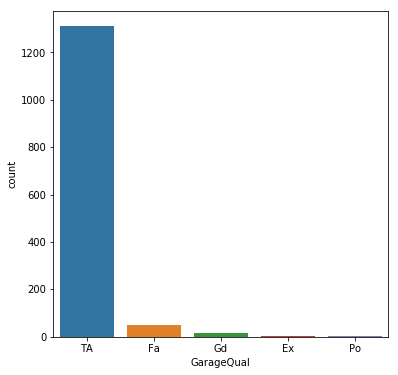

In [457]:
#Check for other variables - GarageQual        
plt.figure(figsize=(6,6))
sns.countplot(house_price.GarageQual)   

In [458]:
#Impute the nulls with the mode
house_price.GarageQual.fillna("TA",inplace=True)

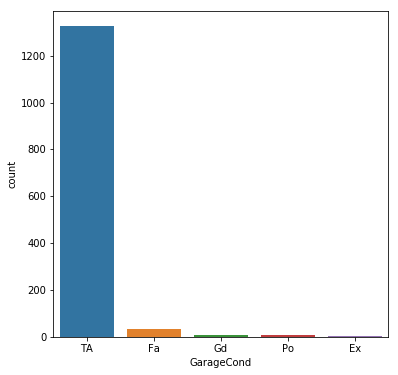

In [459]:
#Check for other variables - GarageCond        
plt.figure(figsize=(6,6))
sns.countplot(house_price.GarageCond) 

In [460]:
#Impute the nulls with the mode
house_price.GarageCond.fillna("TA",inplace=True)

In [461]:
# Checking the percentage of missing values again
data_check = round(100*(house_price.isnull().sum()/len(house_price.index)), 2)

In [462]:
data_check[60:80]

GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
dtype: float64

In [463]:
#Completly imputed data
house_price.shape

(1460, 77)

In [464]:
house_price.head()
house_price_base = house_price #Storing the entire dataset for later use for other model if needed 

In [465]:
# Get the value counts of all the columns - we can decide which columns add no variation to the data and hence can be dropped
for column in house_price:
    print(house_price[column].value_counts())
    print('#####################################')

1460    1
479     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
       ..
966     1
967     1
968     1
969     1
971     1
980     1
972     1
973     1
974     1
975     1
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64
#####################################
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
#####################################
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
#####################################
70.049958     259
60.000000     143
70.000000      70
80.000000      69
50.000000      57
75.000000      53
65.000000      44
85.000000      40
78.000000      25
90.000000      23
21.000000      23
68.000000      19
24.000000      19


0      656
36      29
48      22
20      21
40      19
45      19
30      16
24      16
60      15
39      14
28      14
44      13
50      13
54      13
72      12
      ... 
191      1
189      1
188      1
187      1
185      1
182      1
180      1
176      1
175      1
174      1
159      1
156      1
148      1
142      1
119      1
Name: OpenPorchSF, Length: 202, dtype: int64
#####################################
0      1252
112      15
96        6
120       5
144       5
192       5
216       5
252       4
116       4
156       4
126       3
228       3
128       3
184       3
102       3
       ... 
140       1
143       1
272       1
145       1
386       1
291       1
162       1
169       1
170       1
172       1
174       1
177       1
183       1
189       1
552       1
Name: EnclosedPorch, Length: 120, dtype: int64
#####################################
0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1

Drop all columns which add no value in the dataset

In [466]:
house_price.drop(['LotArea','LotShape','LandContour','LotConfig','Condition1','Condition2','RoofStyle','BsmtQual',
'CentralAir','BsmtFullBath','BedroomAbvGr','TotRmsAbvGrd','GarageArea','GarageQual','GarageCond','EnclosedPorch',
                  '3SsnPorch','ScreenPorch','PoolArea','Neighborhood','BsmtFinType2','OpenPorchSF','YrSold'], axis = 1, inplace = True)

In [467]:
house_price.shape

(1460, 54)

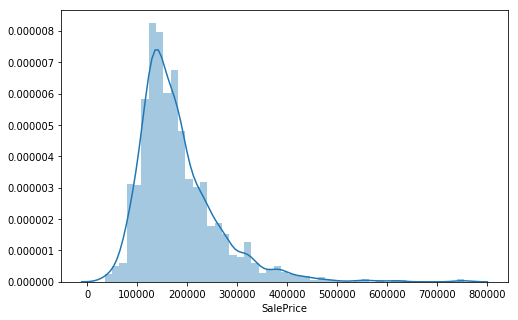

In [468]:
# Target variable: Sale price
plt.figure(figsize=(8,5))
sns.distplot(house_price['SalePrice'])
plt.show()

<Figure size 2880x720 with 0 Axes>

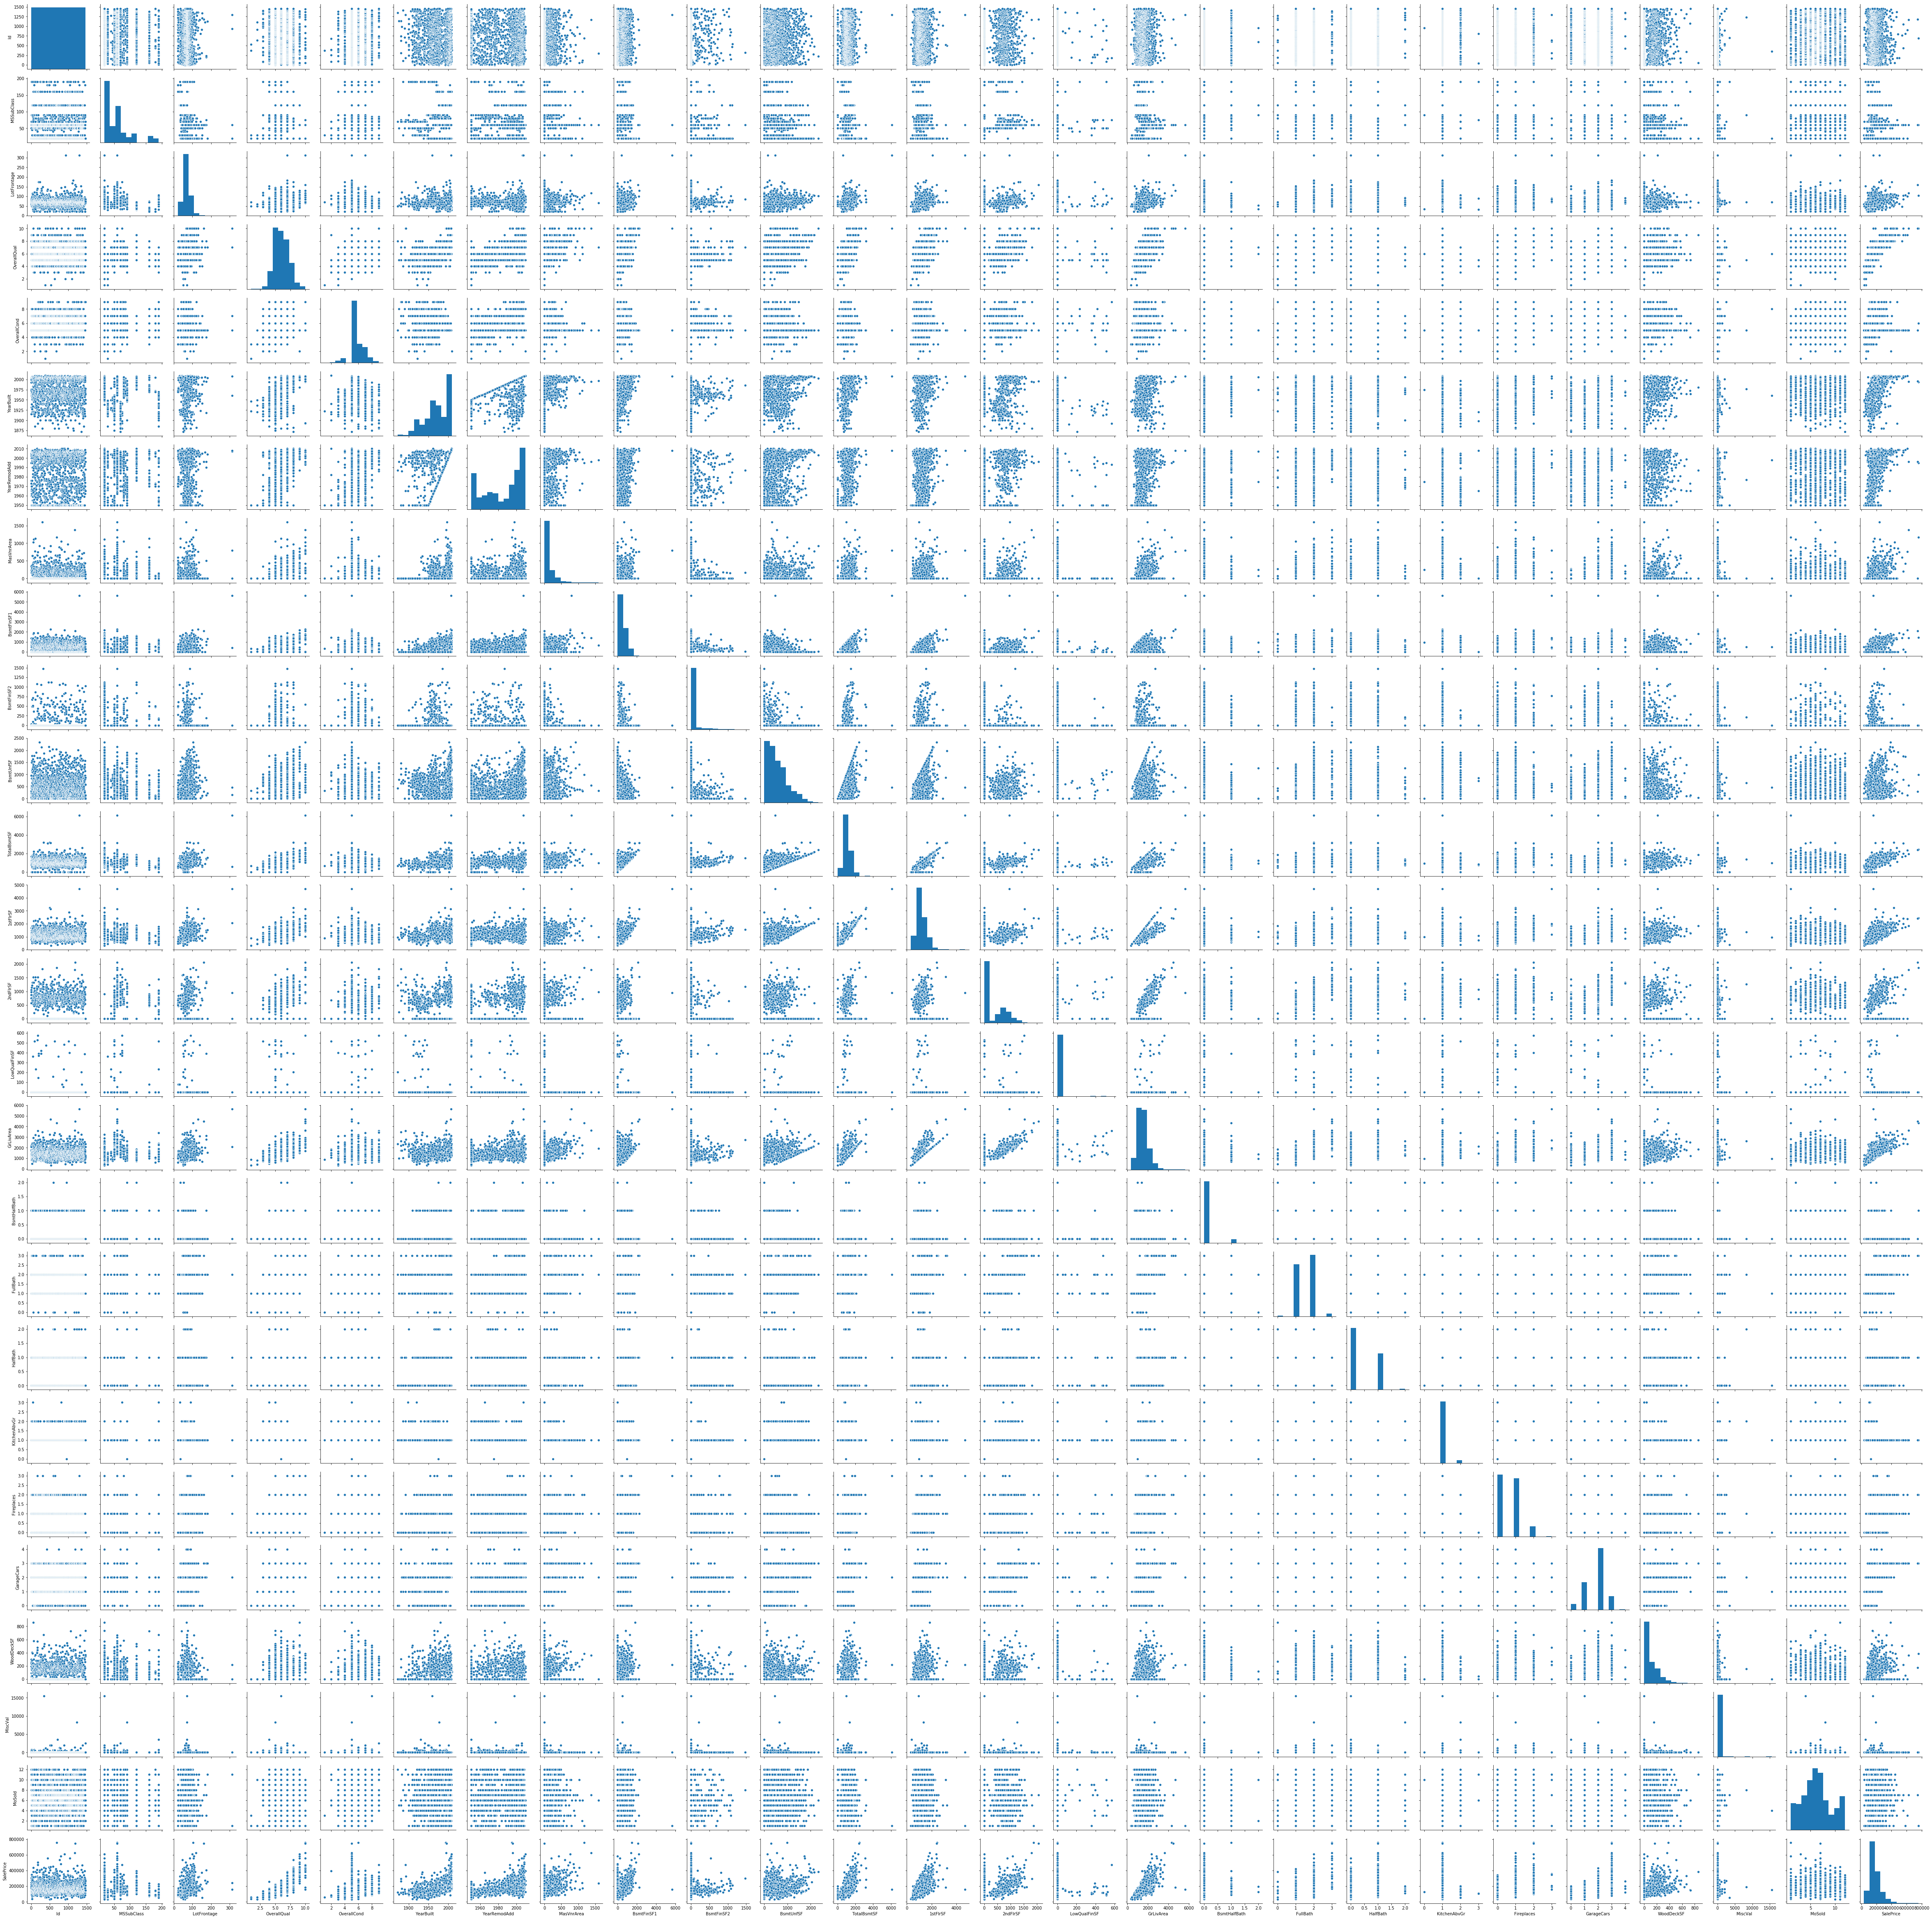

In [469]:
#Check if there is a linear relation between the Saleprice and any variable
# Select all numeric  variables in the dataset
data_numeric = house_price.select_dtypes(include=['int64', 'float64']) #

# paiwise scatter plot
plt.figure(figsize=(40, 10))
sns.pairplot(data_numeric)
plt.show()

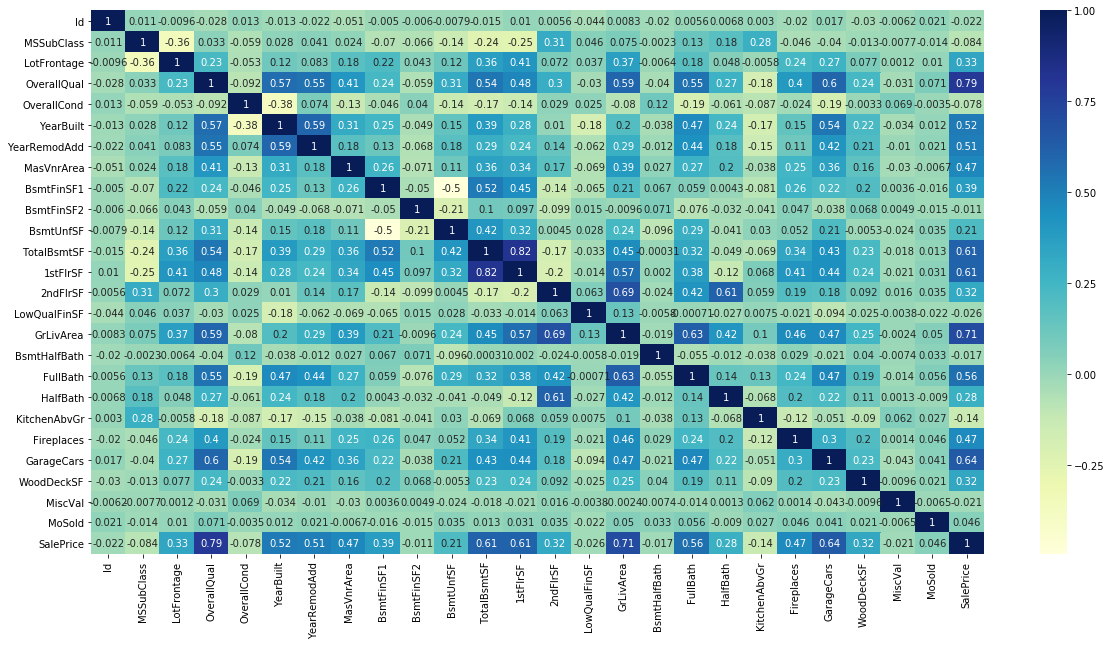

In [470]:
# Above plot is unreadble, hence check the correlation values and see if we can figure anything out 
# Check correlation matrix
house_corr = data_numeric.corr()

# Plotting heatmap
plt.figure(figsize=(20,10))
sns.heatmap(house_corr, cmap="YlGnBu", annot=True)
plt.show()


Based on the above, we can see that Sale price is positvely correlated to OverallQual, GrLivArea,GarageCars,1stFlSF. 
Lets plot with these variables to check if there is a linear relationship.

<Figure size 2880x720 with 0 Axes>

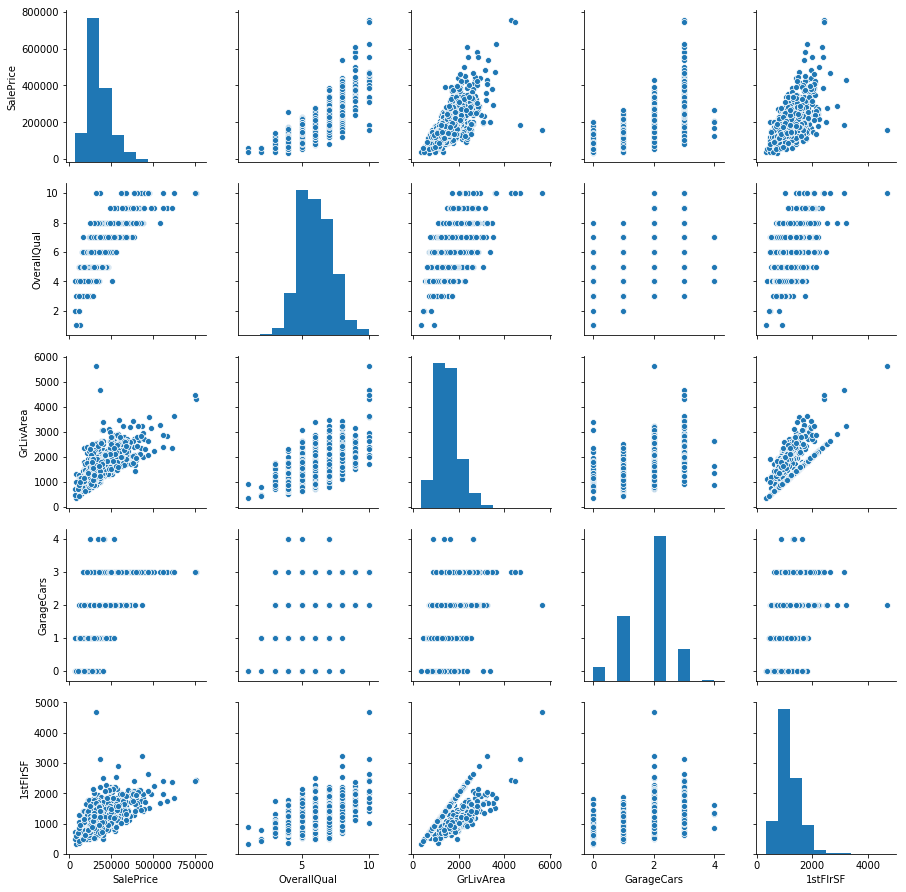

In [471]:
data_numeric = house_price[['SalePrice','OverallQual','GrLivArea','GarageCars','1stFlrSF']]

# paiwise scatter plot
plt.figure(figsize=(40, 10))
sns.pairplot(data_numeric)
plt.show()

As can be seen from the above heatmap and the pairplots, there is a linear correlation between certain variables

#### Derived Variables and Dummy Variable Creation

In [472]:
#Create a derived variable for total built area
house_price['TotalAreaSF'] = house_price['TotalBsmtSF'] +  house_price['1stFlrSF'] + house_price['2ndFlrSF'] + house_price['GrLivArea']


In [473]:
house_price['TotalAreaSF']

0       4276
1       3786
2       4492
3       4190
4       5541
5       3520
6       5074
7       5287
8       4500
9       3145
10      3120
11      5823
12      2736
13      4482
14      3759
        ... 
1445    2640
1446    3564
1447    5400
1448    3252
1449    1890
1450    4480
1451    4729
1452    2691
1453    3420
1454    3663
1455    4247
1456    5688
1457    5832
1458    3234
1459    3768
Name: TotalAreaSF, Length: 1460, dtype: int64

In [474]:
#Drop the raw variables
house_price.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'], axis = 1, inplace = True)

In [475]:
#Create Dummy Variables for all the non-numeric fields

# Get all categorical variables
house_cat = house_price.select_dtypes(include=['object'])
#house_cat.head()

# Get dummies
house_dummies = pd.get_dummies(house_cat, drop_first=True)
house_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Utilities_NoSeWa  LandSlope_Mod  LandSlope_Sev  BldgType_2fmCon  \
0                 0              0              0                0   
1                 0              0              0                0   
2                 0              0              0                0   
3                 0              0              0                0   
4                 0              0              0                0   

   BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  \
0                0               0                0                  0   
1                0               0                0                  0   
2                0               0                0                  0   
3                0               0                0                  0   
4                0               0                0                  0   

   HouseStyle_1Story  HouseStyle_2.5Fin          ...            PavedDrive_P  \
0                  0                  0          ...                       0   
1                  1                  0          ...                       0   
2                  0                  0          ...                       0   
3                  0                  0          ...                       0   
4                  0                  0          ...                       0   

   PavedDrive_Y  SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  \
0             1             0             0               0               0   
1             1             0             0               0               0   
2             1             0             0               0               0   
3             1             0             0               0               0   
4             1             0             0               0               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 226 columns]

In [476]:
# Drop the original categorical variables 
house_price = house_price.drop(list(house_cat.columns), axis=1)
# Add the  dummy variables to the main dataframe
house_price = pd.concat([house_price, house_dummies], axis=1)

In [477]:
house_price.shape

(1460, 249)

#### X-Y split

In [478]:
X = house_price.drop(['SalePrice'], 1)
X.head()

Id  MSSubClass  LotFrontage  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0            7            5       2003   
1   2          20         80.0            6            8       1976   
2   3          60         68.0            7            5       2001   
3   4          70         60.0            7            5       1915   
4   5          60         84.0            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  LowQualFinSF  \
0          2003       196.0         706           0        150             0   
1          1976         0.0         978           0        284             0   
2          2002       162.0         486           0        434             0   
3          1970         0.0         216           0        540             0   
4          2000       350.0         655           0        490             0   

   BsmtHalfBath  FullBath  HalfBath          ...            PavedDrive_P  \
0             0         2         1          ...                       0   
1             1         2         0          ...                       0   
2             0         2         1          ...                       0   
3             0         1         0          ...                       0   
4             0         2         1          ...                       0   

   PavedDrive_Y  SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  \
0             1             0             0               0               0   
1             1             0             0               0               0   
2             1             0             0               0               0   
3             1             0             0               0               0   
4             1             0             0               0               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 248 columns]

In [479]:
# Putting SalePrice variable as y
y = house_price['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

#### Scaling

In [480]:
# Scaling the features
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=248)

#### Train-Test split

In [481]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## RFE and Modelling

In [482]:
# Perform RFE
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### RFE

In [483]:
# Running RFE with 20 variables
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [484]:
#Selected columns
sel_col = X_train.columns[rfe.support_]
sel_col

Index(['MSSubClass', 'OverallQual', 'YearBuilt', 'BsmtUnfSF', 'TotalAreaSF',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA'],
      dtype='object')

### First Model - Using RFE and OLS

In [485]:
# Building a model with the  RFE selected variables
X_train_rfe = X_train[sel_col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lmodel_1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
lmodel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     362.2
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:26:25   Log-Likelihood:                -12015.
No. Observations:                1021   AIC:                         2.406e+04
Df Residuals:                    1005   BIC:                         2.414e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.808e+05    986.587    183.302      0.000    1.79e+05    1.83e+05
MSSubClass       -7691.2509    980.931     -7.841      0.000   -9616.159   -5766.343
OverallQual       2.244e+04   1657.786     13.538      0.000    1.92e+04    2.57e+04
YearBuilt          1.27e+04   1275.397      9.955      0.000    1.02e+04    1.52e+04
BsmtUnfSF        -9391.9719   1070.659     -8.772      0.000   -1.15e+04   -7290.988
TotalAreaSF       4.233e+04   1402.941     30.174      0.000    3.96e+04    4.51e+04
RoofMatl_CompShg  7.724e+04   4479.779     17.241      0.000    6.84e+04     8.6e+04
RoofMatl_Membran  1.643e+04   1210.976     13.569      0.000    1.41e+04    1.88e+04
RoofMatl_Metal    1.633e+04   1214.952     13.440      0.000    1.39e+04    1.87e+04
RoofMatl_Roll     1.473e+04   1203.317     12.241      0.000    1.24e+04    1.71e+04
RoofMatl_Tar&Grv  5.006e+04   3110.992     16.091      0.000     4.4e+04    5.62e+04
RoofMatl_WdShake  3.318e+04   2158.501     15.370      0.000    2.89e+04    3.74e+04
RoofMatl_WdShngl  4.353e+04   2358.886     18.453      0.000    3.89e+04    4.82e+04
KitchenQual_Fa   -9474.1612   1319.545     -7.180      0.000   -1.21e+04   -6884.781
KitchenQual_Gd   -2.395e+04   2198.725    -10.893      0.000   -2.83e+04   -1.96e+04
KitchenQual_TA   -2.985e+04   2573.558    -11.599      0.000   -3.49e+04   -2.48e+04
==============================================================================
Omnibus:                      388.995   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37692.217
Skew:                          -0.761   Prob(JB):                         0.00
Kurtosis:                      32.727   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adj.R2 is 0.84 and hence the model is a decent fit. As per the P values, as variables seem significant. Let us check the VIF 

In [486]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

X_train_new = X_train_rfe.drop(['const'], axis=1)
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5   RoofMatl_CompShg  20.47
9   RoofMatl_Tar&Grv   7.79
14    KitchenQual_TA   6.82
10  RoofMatl_WdShake   5.49
11  RoofMatl_WdShngl   5.46
13    KitchenQual_Gd   5.00
1        OverallQual   2.90
7     RoofMatl_Metal   2.17
6   RoofMatl_Membran   2.16
4        TotalAreaSF   2.13
8      RoofMatl_Roll   2.13
12    KitchenQual_Fa   1.78
2          YearBuilt   1.69
3          BsmtUnfSF   1.22
0         MSSubClass   1.04

In [487]:
#Drop the variable with high VIF and remodel
X_train_rfe = X_train_rfe.drop('RoofMatl_CompShg',1)
lmodel_2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
lmodel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     283.3
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:26:25   Log-Likelihood:                -12148.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                    1006   BIC:                         2.440e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.807e+05   1122.479    161.021      0.000    1.79e+05    1.83e+05
MSSubClass       -7670.8066   1116.063     -6.873      0.000   -9860.885   -5480.728
OverallQual       2.572e+04   1873.705     13.729      0.000     2.2e+04    2.94e+04
YearBuilt         1.189e+04   1450.112      8.198      0.000    9042.003    1.47e+04
BsmtUnfSF        -7432.3090   1211.269     -6.136      0.000   -9809.213   -5055.405
TotalAreaSF       3.397e+04   1497.801     22.680      0.000     3.1e+04    3.69e+04
RoofMatl_Membran  1181.1955    941.036      1.255      0.210    -665.424    3027.815
RoofMatl_Metal     961.6231    939.341      1.024      0.306    -881.669    2804.915
RoofMatl_Roll     -362.9124    939.413     -0.386      0.699   -2206.346    1480.521
RoofMatl_Tar&Grv    35.0561   1277.131      0.027      0.978   -2471.089    2541.201
RoofMatl_WdShake  -424.3628   1055.691     -0.402      0.688   -2495.972    1647.247
RoofMatl_WdShngl  6831.0465   1157.105      5.904      0.000    4560.431    9101.662
KitchenQual_Fa   -9533.7459   1501.320     -6.350      0.000   -1.25e+04   -6587.667
KitchenQual_Gd   -2.258e+04   2499.985     -9.033      0.000   -2.75e+04   -1.77e+04
KitchenQual_TA   -2.952e+04   2928.011    -10.083      0.000   -3.53e+04   -2.38e+04
==============================================================================
Omnibus:                      753.592   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120482.544
Skew:                          -2.454   Prob(JB):                         0.00
Kurtosis:                      55.991   Cond. No.                         6.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [488]:
#Drop the variable with high P value and remodel
X_train_rfe = X_train_rfe.drop('RoofMatl_Tar&Grv',1)
lmodel_3 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
lmodel_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     305.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:26:25   Log-Likelihood:                -12148.
No. Observations:                1021   AIC:                         2.432e+04
Df Residuals:                    1007   BIC:                         2.439e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.807e+05   1121.658    161.139      0.000    1.79e+05    1.83e+05
MSSubClass       -7671.8581   1114.852     -6.882      0.000   -9859.557   -5484.159
OverallQual       2.572e+04   1871.103     13.747      0.000     2.2e+04    2.94e+04
YearBuilt         1.189e+04   1448.906      8.205      0.000    9045.405    1.47e+04
BsmtUnfSF        -7434.1737   1208.763     -6.150      0.000   -9806.156   -5062.191
TotalAreaSF       3.397e+04   1493.835     22.742      0.000     3.1e+04    3.69e+04
RoofMatl_Membran  1181.0900    940.562      1.256      0.210    -664.595    3026.775
RoofMatl_Metal     961.5561    938.871      1.024      0.306    -880.813    2803.925
RoofMatl_Roll     -363.0172    938.939     -0.387      0.699   -2205.518    1479.484
RoofMatl_WdShake  -424.6197   1055.126     -0.402      0.687   -2495.117    1645.878
RoofMatl_WdShngl  6830.8257   1156.503      5.906      0.000    4561.394    9100.257
KitchenQual_Fa   -9531.1286   1497.546     -6.364      0.000   -1.25e+04   -6592.461
KitchenQual_Gd   -2.258e+04   2498.563     -9.037      0.000   -2.75e+04   -1.77e+04
KitchenQual_TA   -2.952e+04   2925.845    -10.090      0.000   -3.53e+04   -2.38e+04
==============================================================================
Omnibus:                      753.635   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120516.088
Skew:                          -2.454   Prob(JB):                         0.00
Kurtosis:                      55.998   Cond. No.                         6.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [489]:
#Drop the variable with high P value and remodel
X_train_rfe = X_train_rfe.drop('RoofMatl_Roll',1)
lmodel_4 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
lmodel_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     331.2
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:26:25   Log-Likelihood:                -12148.
No. Observations:                1021   AIC:                         2.432e+04
Df Residuals:                    1008   BIC:                         2.439e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.807e+05   1121.149    161.209      0.000    1.79e+05    1.83e+05
MSSubClass       -7683.9268   1113.945     -6.898      0.000   -9869.843   -5498.011
OverallQual       2.574e+04   1869.543     13.769      0.000    2.21e+04    2.94e+04
YearBuilt         1.189e+04   1448.286      8.210      0.000    9048.570    1.47e+04
BsmtUnfSF        -7442.0223   1208.082     -6.160      0.000   -9812.667   -5071.378
TotalAreaSF       3.395e+04   1492.068     22.754      0.000     3.1e+04    3.69e+04
RoofMatl_Membran  1180.9321    940.165      1.256      0.209    -663.972    3025.836
RoofMatl_Metal     961.6290    938.475      1.025      0.306    -879.960    2803.218
RoofMatl_WdShake  -423.7430   1054.678     -0.402      0.688   -2493.360    1645.874
RoofMatl_WdShngl  6831.6329   1156.013      5.910      0.000    4563.166    9100.100
KitchenQual_Fa   -9529.0222   1496.904     -6.366      0.000   -1.25e+04   -6591.617
KitchenQual_Gd   -2.258e+04   2497.506     -9.042      0.000   -2.75e+04   -1.77e+04
KitchenQual_TA   -2.953e+04   2924.430    -10.099      0.000   -3.53e+04   -2.38e+04
==============================================================================
Omnibus:                      752.641   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120179.433
Skew:                          -2.449   Prob(JB):                         0.00
Kurtosis:                      55.924   Cond. No.                         6.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [490]:
#Drop the variable with high P value and remodel
X_train_rfe = X_train_rfe.drop('RoofMatl_WdShake',1)
lmodel_5 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
lmodel_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     361.6
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:26:25   Log-Likelihood:                -12148.
No. Observations:                1021   AIC:                         2.432e+04
Df Residuals:                    1009   BIC:                         2.438e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.807e+05   1120.654    161.277      0.000    1.79e+05    1.83e+05
MSSubClass       -7673.3961   1113.173     -6.893      0.000   -9857.796   -5488.996
OverallQual       2.572e+04   1868.031     13.769      0.000    2.21e+04    2.94e+04
YearBuilt         1.191e+04   1447.223      8.226      0.000    9065.344    1.47e+04
BsmtUnfSF        -7412.7733   1205.386     -6.150      0.000   -9778.123   -5047.424
TotalAreaSF       3.391e+04   1487.319     22.796      0.000     3.1e+04    3.68e+04
RoofMatl_Membran  1183.3892    939.754      1.259      0.208    -660.707    3027.485
RoofMatl_Metal     962.2029    938.084      1.026      0.305    -878.616    2803.022
RoofMatl_WdShngl  6839.0630   1155.384      5.919      0.000    4571.831    9106.295
KitchenQual_Fa   -9545.5042   1495.720     -6.382      0.000   -1.25e+04   -6610.427
KitchenQual_Gd   -2.264e+04   2492.342     -9.084      0.000   -2.75e+04   -1.77e+04
KitchenQual_TA   -2.959e+04   2920.341    -10.131      0.000   -3.53e+04   -2.39e+04
==============================================================================
Omnibus:                      750.284   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119473.970
Skew:                          -2.436   Prob(JB):                         0.00
Kurtosis:                      55.770   Cond. No.                         6.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [491]:
#Drop the variable with high P value and remodel
X_train_rfe = X_train_rfe.drop('RoofMatl_Metal',1)
lmodel_6 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
lmodel_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     397.6
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:26:25   Log-Likelihood:                -12148.
No. Observations:                1021   AIC:                         2.432e+04
Df Residuals:                    1010   BIC:                         2.437e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.807e+05   1120.631    161.290      0.000    1.79e+05    1.83e+05
MSSubClass       -7664.0399   1113.165     -6.885      0.000   -9848.420   -5479.660
OverallQual       2.578e+04   1867.067     13.810      0.000    2.21e+04    2.94e+04
YearBuilt         1.191e+04   1447.246      8.231      0.000    9071.760    1.48e+04
BsmtUnfSF        -7452.1194   1204.806     -6.185      0.000   -9816.329   -5087.910
TotalAreaSF       3.387e+04   1486.913     22.778      0.000     3.1e+04    3.68e+04
RoofMatl_Membran  1179.2680    939.770      1.255      0.210    -664.856    3023.392
RoofMatl_WdShngl  6837.1389   1155.413      5.917      0.000    4569.854    9104.423
KitchenQual_Fa   -9532.6488   1495.706     -6.373      0.000   -1.25e+04   -6597.602
KitchenQual_Gd   -2.263e+04   2492.394     -9.080      0.000   -2.75e+04   -1.77e+04
KitchenQual_TA   -2.953e+04   2919.836    -10.112      0.000   -3.53e+04   -2.38e+04
==============================================================================
Omnibus:                      748.463   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118611.029
Skew:                          -2.427   Prob(JB):                         0.00
Kurtosis:                      55.579   Cond. No.                         6.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [492]:
#Drop the variable with high P value and remodel
X_train_rfe = X_train_rfe.drop('RoofMatl_Membran',1)
lmodel_7 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
lmodel_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     441.3
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:26:25   Log-Likelihood:                -12149.
No. Observations:                1021   AIC:                         2.432e+04
Df Residuals:                    1011   BIC:                         2.437e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.808e+05   1120.881    161.268      0.000    1.79e+05    1.83e+05
MSSubClass       -7716.5374   1112.694     -6.935      0.000   -9899.992   -5533.083
OverallQual       2.593e+04   1863.881     13.913      0.000    2.23e+04    2.96e+04
YearBuilt         1.187e+04   1447.204      8.199      0.000    9026.410    1.47e+04
BsmtUnfSF        -7516.7208   1204.048     -6.243      0.000   -9879.440   -5154.002
TotalAreaSF       3.385e+04   1487.291     22.762      0.000    3.09e+04    3.68e+04
RoofMatl_WdShngl  6826.4918   1155.710      5.907      0.000    4558.627    9094.357
KitchenQual_Fa   -9492.7738   1495.793     -6.346      0.000   -1.24e+04   -6557.559
KitchenQual_Gd   -2.257e+04   2492.612     -9.055      0.000   -2.75e+04   -1.77e+04
KitchenQual_TA   -2.938e+04   2918.448    -10.068      0.000   -3.51e+04   -2.37e+04
==============================================================================
Omnibus:                      747.857   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117903.374
Skew:                          -2.425   Prob(JB):                         0.00
Kurtosis:                      55.421   Cond. No.                         6.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [493]:
vif = pd.DataFrame()

X_train_new = X_train_rfe.drop(['const'], axis=1)
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8    KitchenQual_TA  6.79
7    KitchenQual_Gd  4.97
1       OverallQual  2.84
4       TotalAreaSF  1.85
6    KitchenQual_Fa  1.77
2         YearBuilt  1.69
3         BsmtUnfSF  1.19
0        MSSubClass  1.03
5  RoofMatl_WdShngl  1.02

We can stop here, since the VIF are all below 10

#### Now, let us try with Ridge and Lasso regularization techniques

In [494]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [495]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# Using 5 fold cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [496]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.010677      0.001523         0.002280        0.001538      0.0001   
1       0.009407      0.000721         0.001678        0.001499       0.001   
2       0.009305      0.002610         0.000600        0.000799        0.01   
3       0.008763      0.001709         0.001708        0.000593        0.05   
4       0.011324      0.001568         0.000733        0.000904         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -22462.573608      -25091.878796      -23467.597448   
1   {'alpha': 0.001}      -22459.815981      -25090.069118      -23467.457288   
2    {'alpha': 0.01}      -22432.871746      -25072.336154      -23465.960612   
3    {'alpha': 0.05}      -22326.871296      -25000.770964      -23457.467677   
4     {'alpha': 0.1}      -22217.128400      -24926.048010      -23443.535267   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -24455.105604      -23422.377598    -23778.616373      910.201319   
1      -24454.647519      -23420.359021    -23777.178254      910.580036   
2      -24450.080855      -23400.610406    -23763.067841      914.310223   
3      -24430.082978      -23321.489001    -23705.984312      929.239662   
4      -24405.716939      -23238.851095    -23644.856209      945.489137   

   rank_test_score  split0_train_score  split1_train_score  \
0               28       -14641.024080       -14240.591348   
1               27       -14641.116324       -14240.690193   
2               26       -14642.031990       -14241.710276   
3               25       -14645.970120       -14246.337703   
4               24       -14650.653946       -14251.626381   

   split2_train_score  split3_train_score  split4_train_score  \
0       -13975.497269       -14266.511998       -14303.374301   
1       -13975.534100       -14266.593015       -14303.513202   
2       -13975.910115       -14267.402064       -14304.911788   
3       -13977.100898       -14270.973712       -14311.096950   
4       -13977.657966       -14275.482384       -14318.482388   

   mean_train_score  std_train_score  
0     -14285.399799       212.224332  
1     -14285.489367       212.241229  
2     -14286.393246       212.404736  
3     -14290.295876       213.229273  
4     -14294.780613       214.480342

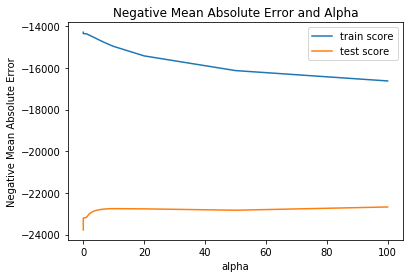

In [497]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [498]:
# Based on the above graph, using the optimal value of alpha = 10 
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.06050243e+02, -2.13570919e+03,  4.94766138e+02,  1.55721164e+04,
        5.76066506e+03,  5.11475246e+03,  2.64181805e+03,  5.76710858e+03,
       -2.62523343e+03, -1.61060772e+03, -8.72224128e+03, -7.43555811e+02,
       -1.30904644e+03,  3.94265805e+03,  4.52785394e+01, -3.94734985e+03,
        4.06808015e+03,  1.04736655e+04,  1.20949951e+03,  2.27388436e+02,
       -5.29594076e+02,  3.48586083e+04,  2.67224420e+03,  1.38885782e+03,
        5.96876755e+03,  2.59805248e+03,  1.39862909e+03, -3.37852356e+02,
        1.27104624e+03,  2.95291350e+03, -6.80085142e+02, -1.59921897e+03,
       -1.40313918e+03, -1.74960546e+03,  9.45637034e+02,  1.83121139e+03,
       -1.25696947e+03, -6.65146845e+02, -2.28958980e+03, -7.67904678e+02,
       -1.49850621e+03,  5.23038317e+04,  1.04264622e+04,  1.04236189e+04,
        1.01049552e+04,  3.35936831e+04,  2.17256338e+04,  3.11288975e+04,
       -3.46701036e+02, -1.07519207e+03,  7.05582641e+02, -3.46930384e+02,
       -7.25767411e+02, -

In [499]:
# predict on the test data - Ridge
from sklearn import metrics
y_train_pred = ridge.predict(X_train)
print("Train R2  "+str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
y_test_pred = lasso.predict(X_test)
print("Test R2  "+str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

Train R2  0.8996707374914105
Test R2  0.8647249152634509


In [500]:
# Features affecting the Sale price based on the lasso  model
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 180481.834),
 ('MSSubClass', -106.05),
 ('OverallQual', -2135.709),
 ('YearBuilt', 494.766),
 ('BsmtUnfSF', 15572.116),
 ('TotalAreaSF', 5760.665),
 ('RoofMatl_WdShngl', 5114.752),
 ('KitchenQual_Fa', 2641.818),
 ('KitchenQual_Gd', 5767.109),
 ('KitchenQual_TA', -2625.233)]

### Lasso

In [501]:
lasso = Lasso()

# Again using the 5 fold cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   31.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [502]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.274899      0.037456         0.002046        0.001160      0.0001   
1       0.266749      0.027033         0.000799        0.001597       0.001   
2       0.275131      0.028847         0.001859        0.001901        0.01   
3       0.277930      0.036067         0.002895        0.001678        0.05   
4       0.275217      0.020054         0.000613        0.000820         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -21987.630853      -24993.874061      -23537.975311   
1   {'alpha': 0.001}      -21987.426101      -24993.531376      -23537.976647   
2    {'alpha': 0.01}      -21985.379350      -24990.105285      -23537.989283   
3    {'alpha': 0.05}      -21976.303588      -24974.888743      -23538.027714   
4     {'alpha': 0.1}      -21965.010237      -24955.892135      -23538.048339   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -24467.474175      -23114.473878    -23618.686581     1052.642179   
1      -24467.435888      -23113.965142    -23618.467970     1052.658946   
2      -24467.061858      -23108.878196    -23616.283868     1052.829851   
3      -24465.431119      -23086.280542    -23606.588023     1053.631127   
4      -24463.409312      -23058.057041    -23594.485887     1054.717919   

   rank_test_score  split0_train_score  split1_train_score  \
0               28       -14643.631094       -14259.827876   
1               27       -14643.631955       -14259.839752   
2               26       -14643.641294       -14259.958533   
3               25       -14643.689136       -14260.495184   
4               24       -14643.756075       -14261.278428   

   split2_train_score  split3_train_score  split4_train_score  \
0       -13995.009372       -14266.363546       -14317.902189   
1       -13995.017455       -14266.364829       -14317.905869   
2       -13995.098874       -14266.378479       -14317.943352   
3       -13995.486873       -14266.440412       -14318.151860   
4       -13996.011000       -14266.519122       -14318.433284   

   mean_train_score  std_train_score  
0     -14296.546815       206.933655  
1     -14296.551972       206.931206  
2     -14296.604107       206.906774  
3     -14296.852693       206.793281  
4     -14297.199582       206.639035

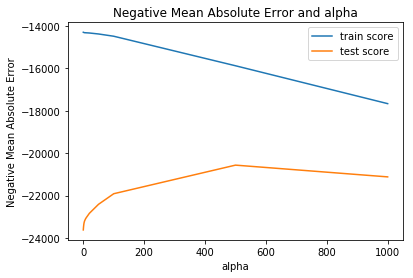

In [503]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [504]:
# Based on the above graph, using the optimal value of alpha = 500 
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [505]:
lasso.coef_

array([-0.00000000e+00, -4.79155156e+03,  0.00000000e+00,  1.68069411e+04,
        4.86630923e+03,  3.79342198e+03,  2.73288356e+03,  5.83141301e+03,
        0.00000000e+00, -2.31288871e+01, -4.83650440e+03, -6.15864696e+02,
       -2.92485804e+02,  2.39757818e+03,  0.00000000e+00, -2.76243790e+03,
        3.91440213e+03,  9.11675438e+03,  1.21965877e+03,  0.00000000e+00,
       -2.91839697e+02,  3.19642457e+04,  0.00000000e+00,  0.00000000e+00,
        1.27039956e+03, -1.66910479e+03,  4.51706354e+02, -5.26426387e+02,
        5.76843972e+02,  1.98071035e+03,  2.83468972e+01, -7.13629706e+02,
       -6.04341180e+02, -0.00000000e+00,  0.00000000e+00,  2.06838378e+02,
       -0.00000000e+00, -2.09012708e+02, -0.00000000e+00, -0.00000000e+00,
       -8.01813549e+02,  4.04906630e+04,  7.74135610e+03,  7.81840914e+03,
        7.22993250e+03,  2.57469578e+04,  1.68873665e+04,  2.50151286e+04,
       -0.00000000e+00, -0.00000000e+00,  1.93081079e+03, -8.12602137e-01,
        0.00000000e+00, -

In [506]:
# predict on the test data
from sklearn import metrics
y_train_pred = lasso.predict(X_train)
print("Train R2  "+str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
y_test_pred = lasso.predict(X_test)
print("Test R2  "+str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

Train R2  0.8839525430020386
Test R2  0.8647249152634509


In [507]:
# Features affecting the Sale price based on the lasso  model
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 180450.518),
 ('MSSubClass', -0.0),
 ('OverallQual', -4791.552),
 ('YearBuilt', 0.0),
 ('BsmtUnfSF', 16806.941),
 ('TotalAreaSF', 4866.309),
 ('RoofMatl_WdShngl', 3793.422),
 ('KitchenQual_Fa', 2732.884),
 ('KitchenQual_Gd', 5831.413),
 ('KitchenQual_TA', 0.0)]

#### Conclusion

Based on the all the 3 modelling techniques and the various models built above, the major contributing parameters for predicting the house price are
1. Total Area of the house
2. Basement Unfinished SF
3. Kitchen Quality - Good/Fair
4. Roof Material - Wood Shingles
